# IML Work 2: Principal Component Analysis Exercise


## Codebase

### Imports

In [1]:
import numpy as np
from scipy.io import arff
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import linalg as LA

np.set_printoptions(linewidth=120)

### Plot functions

In [2]:
def plot_eigen_values(eig_values):
    fig, ax = plt.subplots()
    fig.suptitle("Eigenvalues Plot")
    xvar = np.arange(1, eig_values.shape[0] + 1)

    ax.bar(xvar, eig_values, label="Eigenvalues")
    ax.set_xlabel("Number of components")
    ax.set_ylabel("Eigenvalue")

    ax2 = plt.twinx()
    ax2.plot(xvar, np.cumsum(eig_values / np.sum(eig_values)), color='red',
             label='Accum. Variability')
    ax2.set_ylim(0, 1.1)
    ax2.set_ylabel("% of variance explained")

    print "Explained variance ratio (comp, %) => {}".format(
        zip(xvar, (eig_values / np.sum(eig_values))))

    ax.legend()
    fig.show()

In [3]:
def plot_components(proj, evec, idx=[0, 1], var_labels=None, scale=True):
    assert len(idx) == 2, "Please select only 2 dimensions/components"

    proj_labels = ["PC{}".format(i+1) for i in idx]
    if not var_labels:
        var_labels = ["VAR{}".format(j + 1) for j in range(evec.shape[0])]

    if scale:
        proj = proj[:, idx]/np.ptp(proj[:, idx], axis=0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
    fig.suptitle("PCA Biplot: individuals and variables")

    ax1.grid(linestyle='--', linewidth=0.5)
    ax1.axhline(0, color='darkgray')
    ax1.axvline(0, color='darkgray')
    ax1.scatter(proj[:, idx[0]], proj[:, idx[1]], s=2)
    ax1.set_xlabel(proj_labels[0])
    ax1.set_ylabel(proj_labels[1])
    ax1.axis('equal')

    ax2.grid(linestyle='--', linewidth=0.5)
    ax2.axhline(0, color='darkgray')
    ax2.axvline(0, color='darkgray')
    ax2.axis('equal')
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_xlabel(proj_labels[0])
    ax2.set_ylabel(proj_labels[1])


    circle1 = plt.Circle((0, 0), 1, linewidth=1, fill=False)
    ax2.add_artist(circle1)

    for j, label in enumerate(var_labels):
        ax2.arrow(0, 0, evec[j, idx[0]], evec[j, idx[1]], color='r', alpha=0.5)
        ax2.text(evec[j, idx[0]] * 1.1, evec[j, idx[1]] * 1.1, label,
                 color='r', ha='center', va='center')

    fig.show()

In [4]:
def descriptive_stats(X,var_labels):
    # Descriptive statistics
    sep = "\t"
    print sep.join(["var", "Min.", "1st Qu.", "Median", "Mean", "Std.Dev", "3rd Qu.",
                    "Max."])
    for i in range(X.shape[1]):
        stats = [
            np.min(X[:, i]),
            np.percentile(X[:, i], 0.25),
            np.percentile(X[:, i], 0.5),
            np.mean(X[:, i]),
            np.std(X[:, i]),
            np.percentile(X[:, i], 0.75),
            np.max(X[:, i])
        ]
        print sep.join([var_labels[i]] + ["%.2f" %s for s in stats])

In [5]:
def plot_vars(var_labels, var_data, var_1, var_2):
    # Plot 2 original vars
    idx = [var_1, var_2]
    plt.figure()
    plt.title("Scatter plot: {} vs {}".format(var_labels[idx[1]], var_labels[idx[0]]))
    plt.grid(linestyle='--', linewidth=0.5)
    plt.scatter(var_data[:, idx[0]], var_data[:, idx[1]], s=2)
    plt.xlabel(var_labels[idx[0]])
    plt.ylabel(var_labels[idx[1]])
    plt.show()

In [6]:
def plot_correlation(X):
    # Correlation Visualization
    plt.matshow(np.corrcoef(X.transpose())-np.identity(X.shape[1]),
                cmap="RdBu", vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.colorbar()
    plt.show()

### PCA implementation

In [7]:
def iml_pca(x_data,x_labels,k=None,standardized=False):

    #calculate the mean of each feature
    means_array = np.mean(x_data, axis=0)
    
    if standardized:
        std_array = np.std(x_data, axis=0)
        pca_data = (x_data - means_array) / std_array
    else:
        #Substract the mean of the feature to each feature value
        pca_data=x_data-means_array

            
    #print ("values after substracting the mean")
    #plot_vars(x_labels, pca_data, 2, 3)
    #plot_vars(x_labels, pca_data, 2, 4)
    #plot_vars(x_labels, pca_data, 3, 4)
    
    #print ("Correlation matrix")
    plot_correlation(pca_data)
    
    #Calculate covariance matrix
    covars_matrix = np.cov(pca_data, rowvar=False)
    print ("Covar matrix")
    print covars_matrix
    
    
    #Calculate the eigenvectors and eigenvalues
    w, v = LA.eig(covars_matrix)
    #print "Eigenvalues:"
    #print w
    #print "Eigenvectors:"
    #print v

    #Sort the eigenvectors and eigenvalues
    idx = w.argsort()[::-1]
    eigenValues = w[idx]
    eigenVectors = v[:,idx]

    print "Eigenvalues:"
    print eigenValues
    print "Eigenvectors:"
    print eigenVectors
    
    plot_eigen_values(eigenValues)
    
    if not k:
        #How to chose k?
        for k in range(2,len(eigenVectors)):
            if (np.sum(eigenValues[0:k])/np.sum(eigenValues)) > 0.9:
                break
    
    print "K value is: {}".format(k)

    kEigenVectors=eigenVectors[:,0:k]
    kEigenValues=eigenValues[0:k]

    #print ("Eigen vectors (k)")
    #print kEigenVectors
    #print ("Eigen values (k)")
    #print kEigenValues

    #derive new data set
    newDataSet=np.dot(pca_data, kEigenVectors)
    
    #print ("New Data")
    #print newDataSet.shape
    
    plot_vars(["PC1","PC2"], newDataSet, 0, 1)
    #plot_vars(["PC1","PC2","PC3"], newDataSet, 1, 2)

    #reconstruction
    dataRecover = np.dot(newDataSet, kEigenVectors.transpose()) + means_array
    if standardized:
        dataRecover = dataRecover * std_array
    
    print ("Data reconstructed")
    plot_vars(x_labels, dataRecover, 0, 1)
    #plot_vars(x_labels, dataRecover.transpose(), 2, 4)
    #plot_vars(x_labels, dataRecover.transpose(), 3, 4)

### Datasets

#### Iris dataset

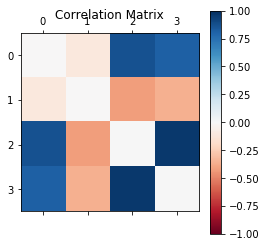

Covar matrix
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
Eigenvalues:
[ 4.22484077  0.24224357  0.07852391  0.02368303]
Eigenvectors:
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
Explained variance ratio (comp, %) => [(1, 0.92461620717426862), (2, 0.053015567850535079), (3, 0.017185139525006825), (4, 0.0051830854501895805)]
K value is: 2


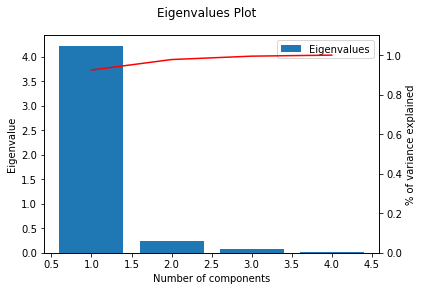

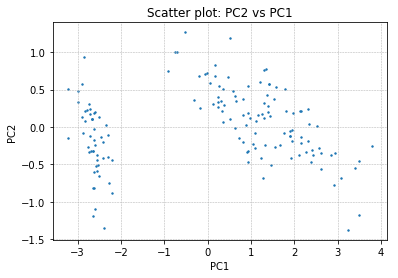

Data reconstructed


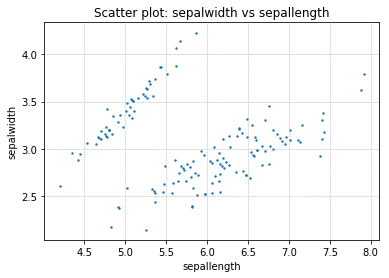

In [16]:
# Iris dataset
iris, iris_meta = arff.loadarff("datasets/iris.arff")
iris_data = np.array([iris['sepallength'], iris['sepalwidth'],
                      iris['petallength'], iris['petalwidth']]).transpose()
iris_class = iris['class'].reshape((150, 1))
iris_labels = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

iml_pca(iris_data, iris_labels, k=2)

In [9]:
# Compare with Scikit-learn
pca = PCA(n_components=4)
pca.fit_transform(iris_data)
pca.components_.transpose() # signs changed
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

array([[ 0.36158968,  0.65653988, -0.58099728,  0.31725455],
       [-0.08226889,  0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211, -0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393, -0.07470647,  0.54906091,  0.75112056]])

#### Wine Dataset

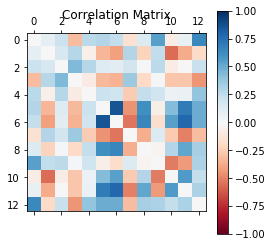

Covar matrix
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446  0.23815287 -0.15681042  0.13747022  0.549451
  -0.07215255  0.07275191  0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606  -0.41332866  0.29463237 -0.22199334
   0.25039204 -0.56446685 -0.37079354 -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824  0.11572743  0.1872826   0.00970647  0.2603499
  -0.07508874  0.00393333  0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752 -0.353355    0.36396647 -0.19844168
   0.01883781 -0.27550299 -0.27833221 -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254  0.19688989 -0.25774204  0.23777643
   0.20107967  0.05571118  0.06637684  0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972  0.86944804 -0.45247731  0.61587304
  -0.05544792  0.43613151  0.70390388  0.50092909]
 [ 0.23815287 -0.4133286

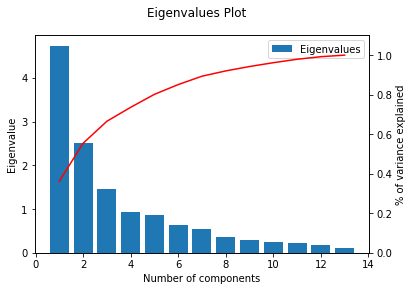

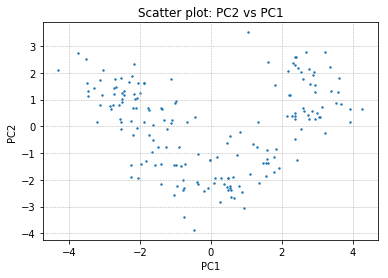

Data reconstructed


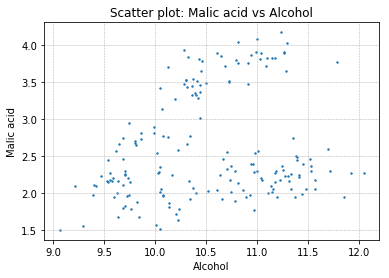

In [10]:
wine, wine_meta = arff.loadarff("datasets/wine.arff")
wine_data = np.array([wine['a1'], wine['a2'], wine['a3'], wine['a4'], wine['a5'],
                     wine['a6'], wine['a7'], wine['a8'], wine['a9'], wine['a10'],
                     wine['a11'], wine['a12'], wine['a13']]).transpose()
wine_class = wine['class'].reshape((178, 1))

wine_labels = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
              "Total phenols", "Flavanoids", "Nonflavanoid phenols",
              "Proanthocyanins", "Color intensity", "Hue",
              "OD280/OD315 of diluted wines", "Proline"]

iml_pca(wine_data, wine_labels, standardized=True, k=2)

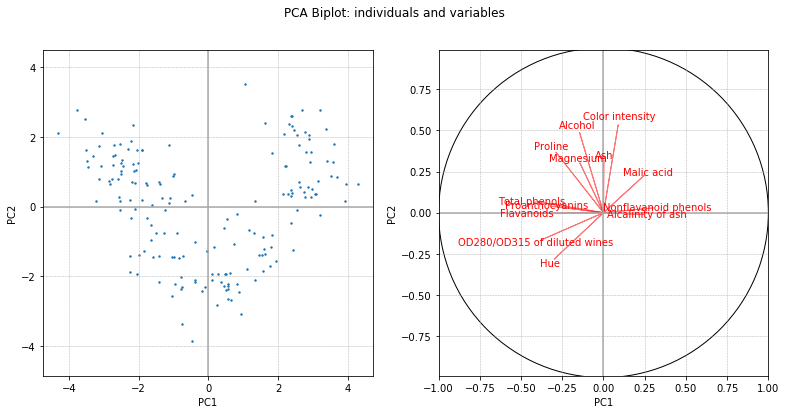

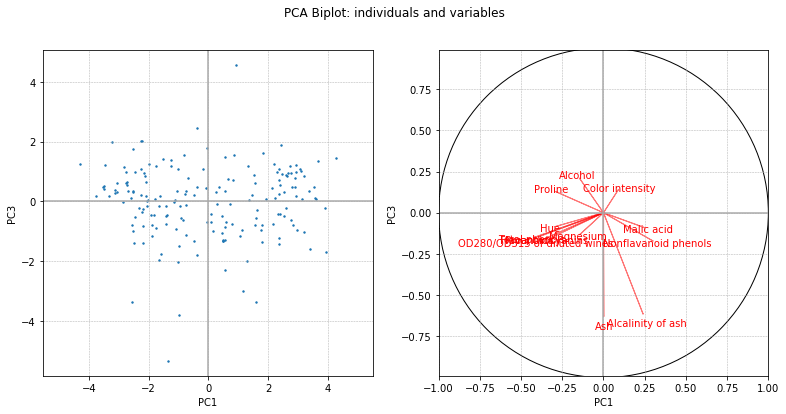

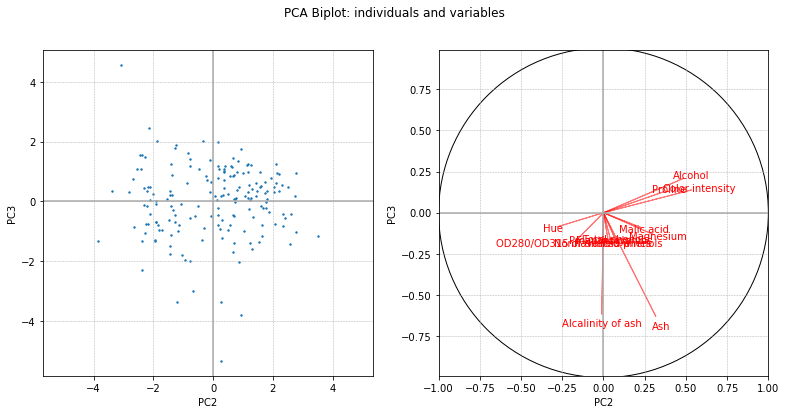

In [13]:
# PCA Algorithm Steps
X = wine_data.copy()

# Standardize the variables: x_std = (x - mean(x)) / sd(x)
col_means = np.mean(X, axis=0)
col_stdev = np.std(X, axis=0)
X_centered = (X - col_means) / col_stdev

# Var and Covar matrix
X_cov = np.cov(X_centered, rowvar=False)

# Compute eigenvalues and eigenvectors and sort them
eig_values, eig_vectors = np.linalg.eig(X_cov)
idx_sorted = np.argsort(-eig_values)
eig_values = eig_values[idx_sorted]
eig_vectors = eig_vectors[:, idx_sorted]

# Create projections
X_proj = np.dot(X_centered, eig_vectors)

# Plot projections of individuals and variables
plot_components(X_proj, eig_vectors, idx=[0, 1], var_labels=wine_labels, scale=False)
plot_components(X_proj, eig_vectors, idx=[0, 2], var_labels=wine_labels, scale=False)
plot_components(X_proj, eig_vectors, idx=[1, 2], var_labels=wine_labels, scale=False)

plt.show()

#### Bupa Dataset

var	Min.	1st Qu.	Median	Mean	Std.Dev	3rd Qu.	Max.
MCV	65.00	76.18	78.72	90.16	4.44	79.00	103.00
alkphos	23.00	33.32	35.72	69.87	18.32	36.58	138.00
sgpt	4.00	4.86	7.88	30.41	19.48	9.00	155.00
sgot	5.00	7.58	8.00	24.64	10.05	9.74	82.00
gammagt	5.00	5.00	5.00	38.28	39.20	5.58	297.00
drinks	0.00	0.00	0.00	3.46	3.33	0.00	20.00


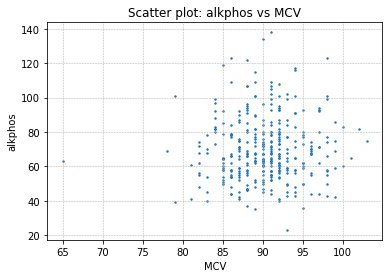

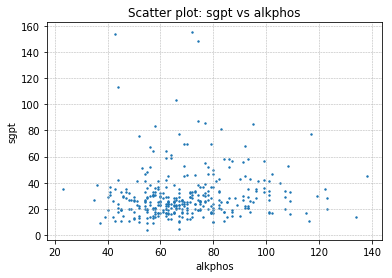

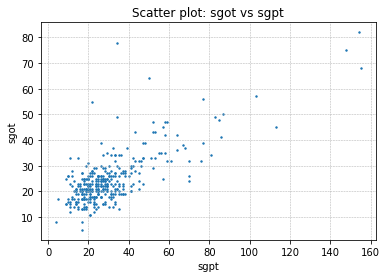

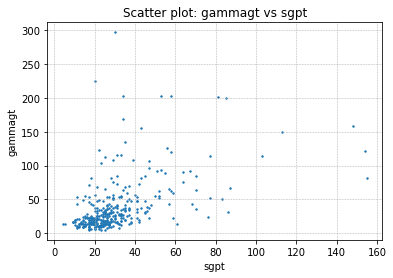

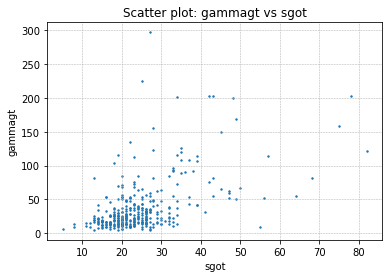

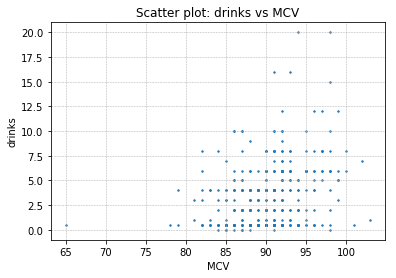

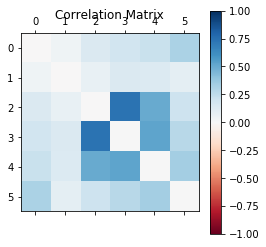

Covar matrix
[[   19.7855578      3.59934277    12.81884058     8.40583923    38.81795585     4.6423576 ]
 [    3.59934277   336.63700708    27.28273509    26.97080384    95.89180991     6.17290192]
 [   12.81884058    27.28273509   380.73019885   145.25846815   385.60532524    13.47177283]
 [    8.40583923    26.97080384   145.25846815   101.29403438   208.45331143     9.39236603]
 [   38.81795585    95.89180991   385.60532524   208.45331143  1540.92489046    44.70902005]
 [    4.6423576      6.17290192    13.47177283     9.39236603    44.70902005    11.14114425]]
Eigenvalues:
[ 1704.23455772   329.48615401   290.92117087    37.76391713    19.59323592     8.51379717]
Eigenvectors:
[[  2.48915066e-02   1.98561179e-03   4.94442234e-03   1.08533543e-01  -9.43765959e-01   3.11252804e-01]
 [  7.49485205e-02   9.95571826e-01  -3.81810281e-02  -4.14076557e-02   1.32930005e-03   6.73102408e-03]
 [  2.92623798e-01  -2.31264856e-03   8.89478140e-01  -3.49274184e-01  -3.21086702e-02  -1.30836279

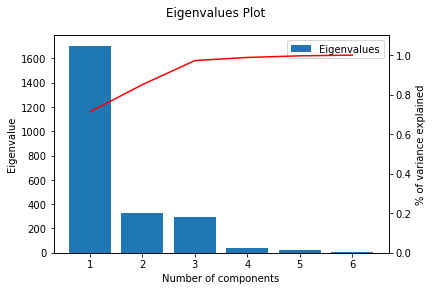

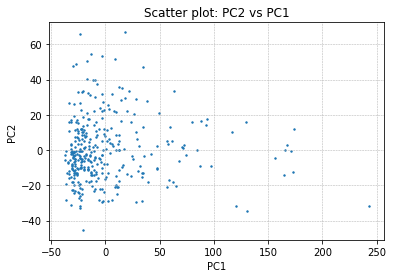

Data reconstructed


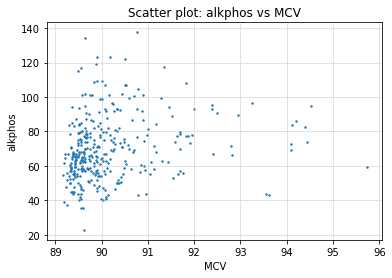

In [14]:
f = "datasets/bupa.arff"
data, meta = arff.loadarff(f)

#print meta

data_num = np.zeros((len(data), 6))
data_labels = ["MCV","alkphos","sgpt","sgot","gammagt","drinks"]


i = 0
for d in data:
    data_num[i, :] = [d[0], d[1], d[2], d[3],d[4], d[5]]
    i += 1

descriptive_stats(data_num, data_labels)

plot_vars(data_labels, data_num, 0, 1)
plot_vars(data_labels, data_num, 1, 2)
plot_vars(data_labels, data_num, 2, 3)
plot_vars(data_labels, data_num, 2, 4)
plot_vars(data_labels, data_num, 3, 4)
plot_vars(data_labels, data_num, 0, 5)


iml_pca(data_num,data_labels)

[[  2.30070888e+01   3.69557974e+00   1.34349332e+01   6.74572130e+00   3.89027382e+01   1.19311082e+00]
 [  3.69557974e+00   3.36610518e+02   2.70528405e+01   2.75809890e+01   9.58661875e+01   6.14448521e+00]
 [  1.34349332e+01   2.70528405e+01   3.78806610e+02   1.50344254e+02   3.85372043e+02   1.41539601e+01]
 [  6.74572130e+00   2.75809890e+01   1.50344254e+02   8.78558927e+01   2.09076731e+02   7.34592130e+00]
 [  3.89027382e+01   9.58661875e+01   3.85372043e+02   2.09076731e+02   1.54090237e+03   4.45502553e+01]
 [  1.19311082e+00   6.14448521e+00   1.41539601e+01   7.34592130e+00   4.45502553e+01   2.33303555e+01]]
[ 1704.23455772   329.48615401   290.92117087]


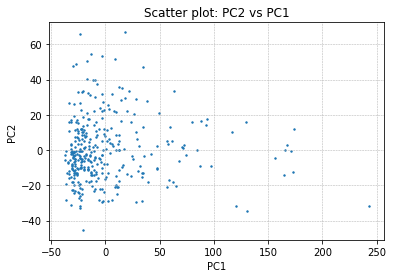

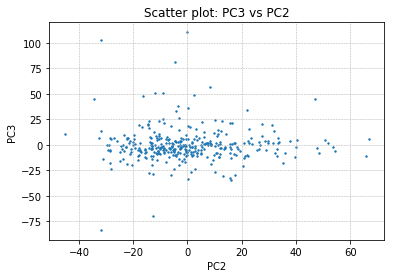

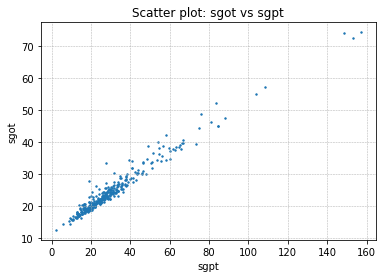

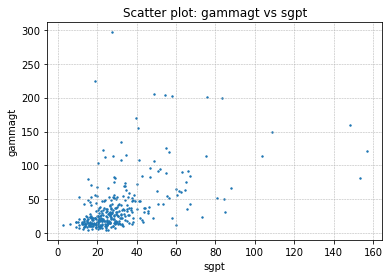

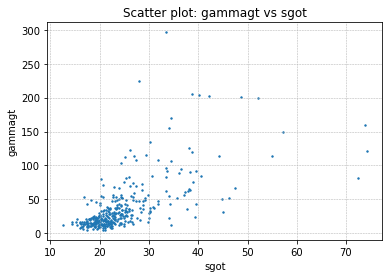

In [15]:
#Comapring with sklearn pca

pca = PCA(n_components=3)

newPCAData=pca.fit_transform(data_num)


covar=pca.get_covariance()
print covar

eigenvalues_sk = pca.explained_variance_
print eigenvalues_sk


recoverdata=pca.inverse_transform(newPCAData)


plot_vars(["PC1","PC2"], newPCAData, 0, 1)
plot_vars(["PC1","PC2","PC3"], newPCAData, 1, 2)
plot_vars(data_labels, recoverdata, 2, 3)
plot_vars(data_labels, recoverdata, 2, 4)
plot_vars(data_labels, recoverdata, 3, 4)